# Практическая работа №9. Генерация сигналов и преобразования Фурье

# Блок №1. Базовый уровень

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import spectrogram

## **Задание 1: Генерация сигналов**



В этом задании вам нужно создать различные виды сигналов. Сигналы являются основой цифровой обработки сигналов, и умение их генерировать является важным навыком.













1. **Синусоидальный сигнал**: Синусоидальный сигнал можно представить как $A \sin(2\pi ft + \phi)$, где $A$ - амплитуда, $f$ - частота, $\phi$ - фаза.

- Создайте функцию, которая принимает эти параметры, а также длительность сигнала, и возвращает сгенерированный сигнал.

### Пример:



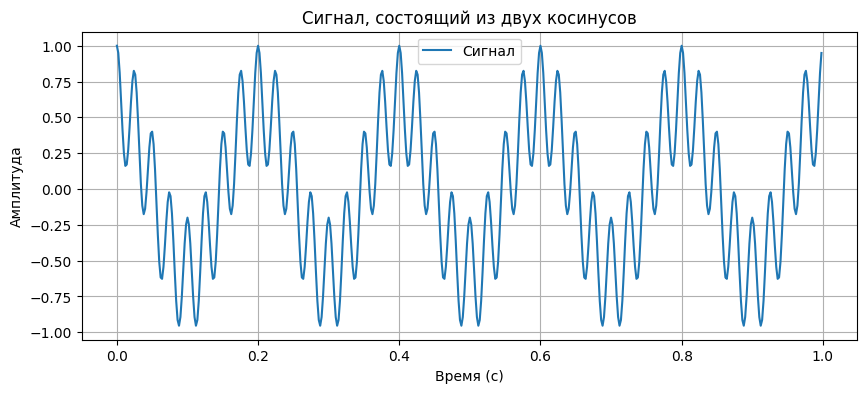

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Параметры времени
T = 1.0         # длительность сигнала в секундах
fs = 500.0      # частота дискретизации (в герцах)
t = np.arange(0, T, 1/fs) # массив времени

# Создание сигнала
f1 = 5.0        # частота первого косинуса
f2 = 40.0       # частота второго косинуса
a1 = 0.6        # амплитуда первого косинуса
a2 = 0.4        # амплитуда второго косинуса
signal = a1*np.cos(2*np.pi*f1*t) + a2*np.cos(2*np.pi*f2*t)

# Визуализация сигнала
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Cигнал, состоящий из двух косинусов')
plt.legend()
plt.grid(True)
plt.show()


### Ваш код:

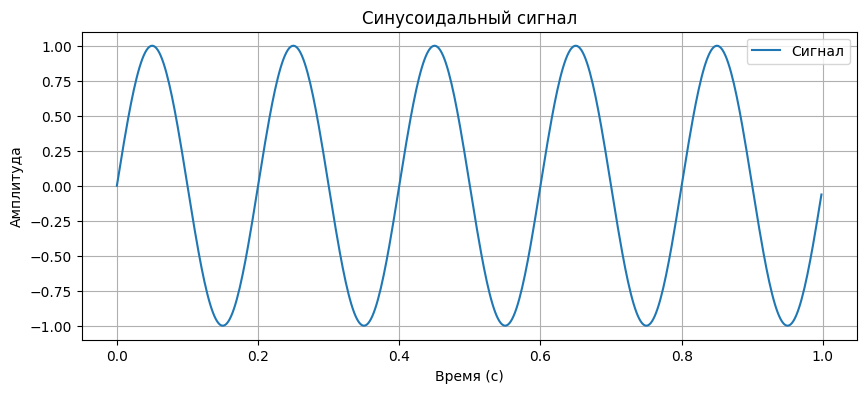

In [89]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sinusoidal_signal(amplitude, frequency, phase, duration, sampling_freq=500):
    t = np.arange(0, duration, 1/sampling_freq)
    signal = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    return t, signal


A = 1.0  # амплитуда
f = 5.0  # частота
phi = 0  # фаза
T = 1.0  # длительность


t, signal = generate_sinusoidal_signal(A, f, phi, T)

plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Синусоидальный сигнал')
plt.legend()
plt.grid(True)
plt.show()

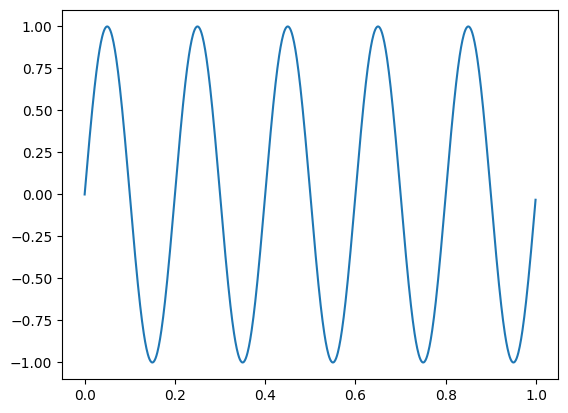

In [ ]:
# Пример

2. **Сумма синусоид**: Сигнал, состоящий из суммы двух синусоид, можно представить как $A_1 \sin(2\pi f_1t + \phi_1) + A_2 \sin(2\pi f_2t + \phi_2)$.

- Создайте функцию, которая принимает параметры для двух синусоид, а также длительность сигнала, и возвращает сгенерированный сигнал.

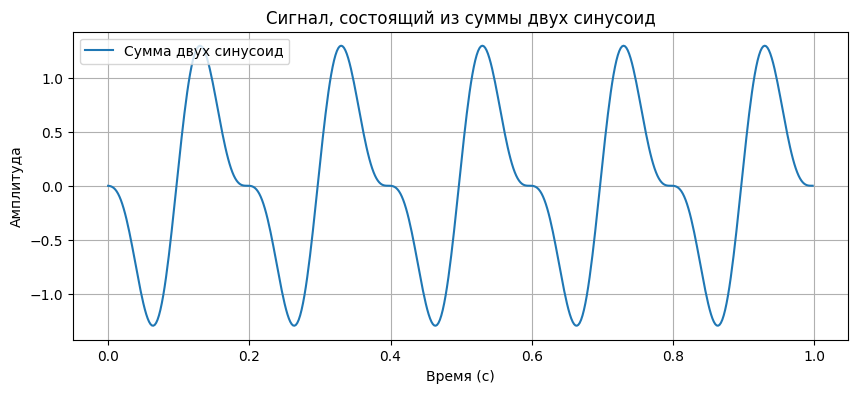

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sum_of_sinusoids_signal(amplitude1, frequency1, phase1, amplitude2, frequency2, phase2, duration, sampling_freq=500):
    t = np.arange(0, duration, 1/sampling_freq)
    signal1 = amplitude1 * np.sin(2 * np.pi * frequency1 * t + phase1)
    signal2 = amplitude2 * np.sin(2 * np.pi * frequency2 * t + phase2)
    signal = signal1 + signal2
    return t, signal


A1 = -1  # амплитуда первой синусоиды
f1 = 5.0  # частота первой синусоиды
phi1 = 0.1  # фаза первой синусоиды
A2 = 0.5  # амплитуда второй синусоиды
f2 = 10.0  # частота второй синусоиды
phi2 = 0.2  # фаза второй синусоиды
T = 1.0  # длительность сигнала


t, signal = generate_sum_of_sinusoids_signal(A1, f1, phi1, A2, f2, phi2, T)

plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Сумма двух синусоид')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал, состоящий из суммы двух синусоид')
plt.legend()
plt.grid(True)
plt.show()

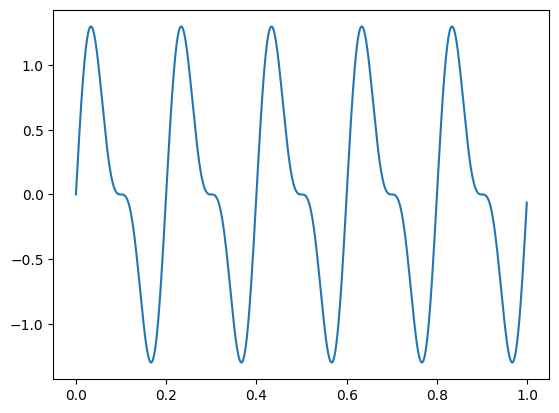

In [ ]:
# Пример

3. **Шумовой сигнал**: Шумовой сигнал (или белый шум) можно сгенерировать как случайные значения из нормального распределения.

- Создайте функцию, которая принимает амплитуду шума и длительность сигнала, и возвращает сгенерированный шумовой сигнал.

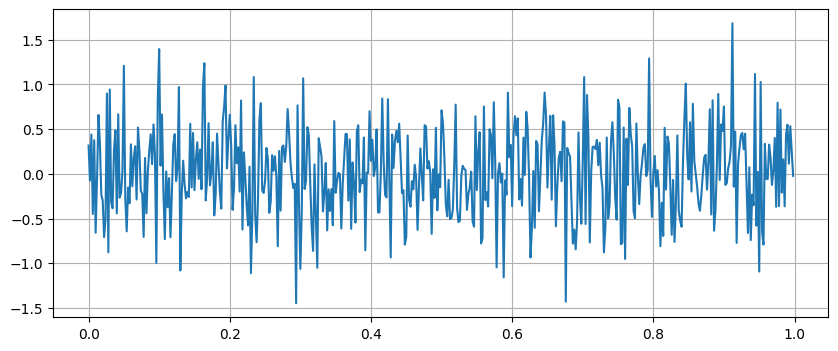

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def generate_noise_signal(amplitude, duration, sampling_freq=500):
    t = np.arange(0, duration, 1/sampling_freq)
    noise = amplitude * np.random.normal(size=len(t))
    return t, noise

amplitude = 0.5  # амплитуда шума
duration = 1.0  # длительность сигнала

t, noise = generate_noise_signal(amplitude, duration)


plt.figure(figsize=(10, 4))
plt.plot(t, noise)
plt.grid(True)
plt.show()

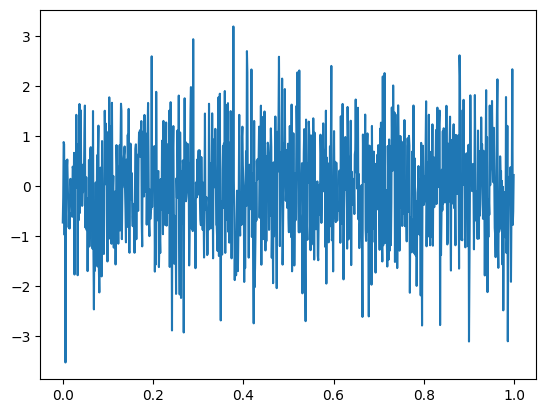

In [ ]:
# Пример

4. **Синусоида плюс шум**: Сигнал, который представляет собой сумму синусоиды и шума, можно сгенерировать путем сложения синусоидального и шумового сигналов.
- Создайте функцию, которая принимает параметры для синусоиды и шума, а также длительность сигнала, и возвращает сгенерированный сигнал.

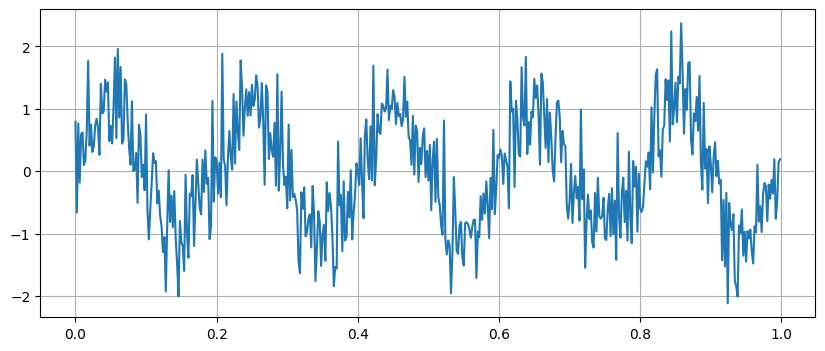

In [93]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sinusoid_plus_noise_signal(amplitude_sin, frequency_sin, phase_sin, amplitude_noise, duration, sampling_freq=500):
    t = np.arange(0, duration, 1/sampling_freq)
    sinusoid = amplitude_sin * np.sin(2 * np.pi * frequency_sin * t + phase_sin)  # генерация синусоидального сигнала
    noise = amplitude_noise * np.random.normal(size=len(t))  # генерация шумового сигнала
    signal = sinusoid + noise
    return t, signal

amplitude_sin = 1.0  # амплитуда синусоиды
frequency_sin = 5.0  # частота синусоиды
phase_sin = 0.0  # фаза синусоиды
amplitude_noise = 0.5  # амплитуда шума
duration = 1.0  # длительность сигнала

t, signal = generate_sinusoid_plus_noise_signal(amplitude_sin, frequency_sin, phase_sin, amplitude_noise, duration)

plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.grid(True)
plt.show()

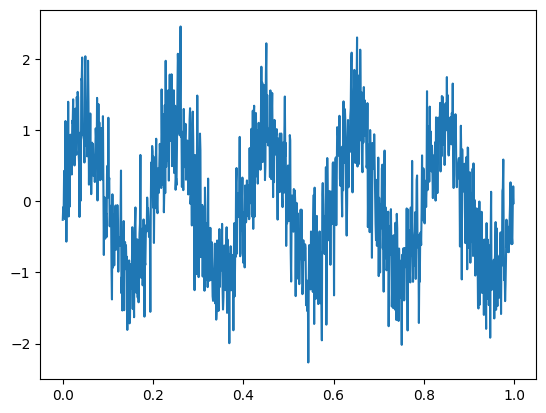

In [ ]:
# Пример

## **Задание 2: Преобразование Фурье**


Преобразование Фурье позволяет перейти от временного представления сигнала к частотному. Это основной инструмент для анализа сигналов. Создайте функцию, которая принимает сигнал и возвращает его преобразование Фурье.


1. Примените преобразование Фурье к синусоидальному сигналу и визуализируйте результат.


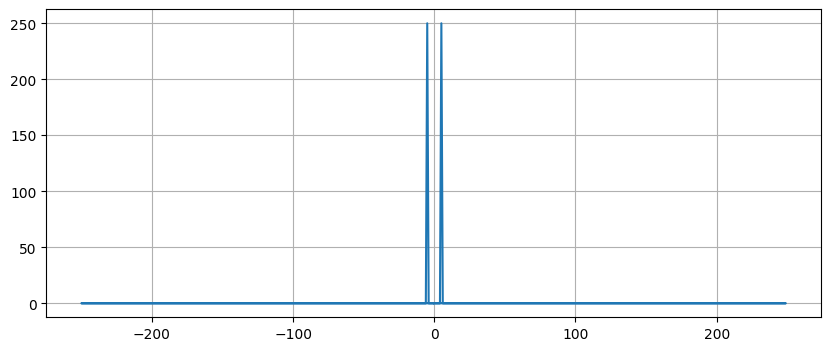

In [90]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

def compute_fft(signal, fs=500):
    fft_values = fft(signal)
    fft_freq = fftfreq(len(signal), 1/fs)
    fft_amplitude = np.abs(fft_values)
    fft_phase = np.angle(fft_values)
    return fft_freq, fft_amplitude, fft_phase


A = 1.0  # амплитуда
f = 5.0  # частота
phi = 0  # фаза
T = 1.0  # длительность

t, signal = generate_sinusoidal_signal(A, f, phi, T)

fft_freq, fft_amplitude, fft_phase = compute_fft(signal)


plt.figure(figsize=(10, 4))
plt.plot(fft_freq, fft_amplitude)
plt.grid(True)
plt.show()

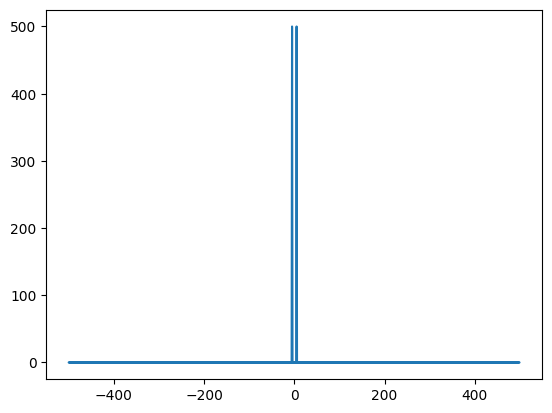

In [ ]:
# Пример

2. Примените преобразование Фурье к сигналу, состоящему из суммы двух синусоид, и визуализируйте результат.


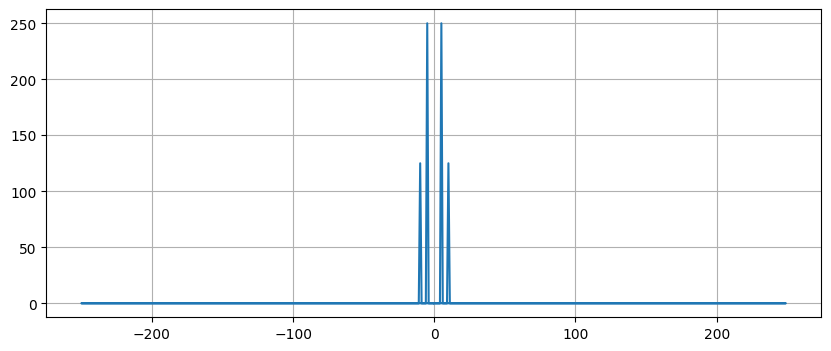

In [92]:
A1 = -1  # амплитуда первой синусоиды
f1 = 5.0  # частота первой синусоиды
phi1 = 0.1  # фаза первой синусоиды
A2 = 0.5  # амплитуда второй синусоиды
f2 = 10.0  # частота второй синусоиды
phi2 = 0.2  # фаза второй синусоиды
T = 1.0  # длительность сигнала


t, signal = generate_sum_of_sinusoids_signal(A1, f1, phi1, A2, f2, phi2, T)

fft_freq, fft_amplitude, fft_phase = compute_fft(signal)


plt.figure(figsize=(10, 4))
plt.plot(fft_freq, fft_amplitude)
plt.grid(True)
plt.show()

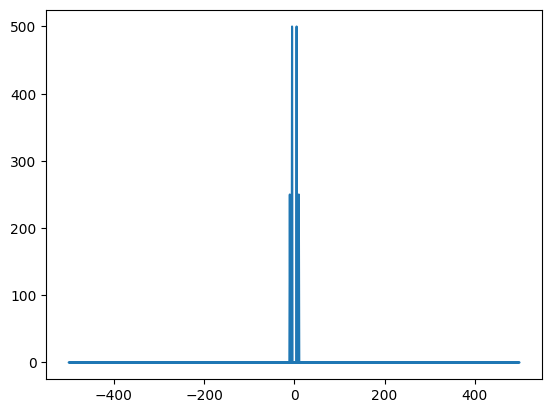

In [ ]:
# Пример

3. Примените преобразование Фурье к шумовому сигналу и визуализируйте результат.


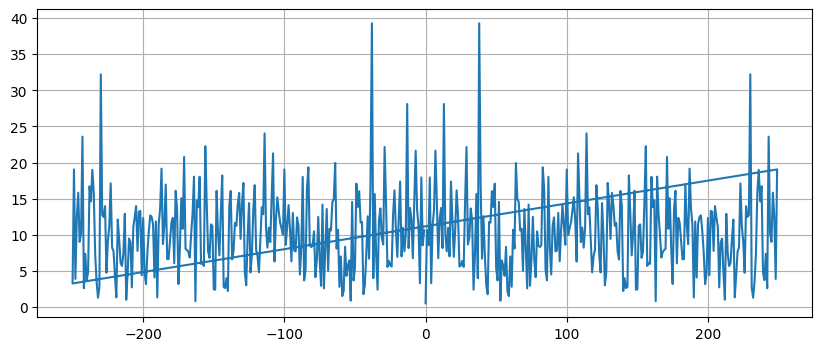

In [97]:
amplitude = 0.5  # амплитуда шума
duration = 1.0  # длительность сигнала

t, noise = generate_noise_signal(amplitude, duration)

fft_freq, fft_amplitude, fft_phase = compute_fft(noise)


plt.figure(figsize=(10, 4))
plt.plot(fft_freq, fft_amplitude)
plt.grid(True)
plt.show()

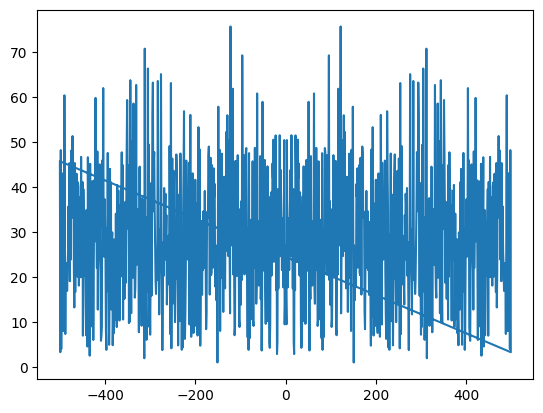

In [ ]:
# Пример

4. Примените преобразование Фурье к сигналу, который представляет собой сумму синусоиды и шума, и визуализируйте результат.

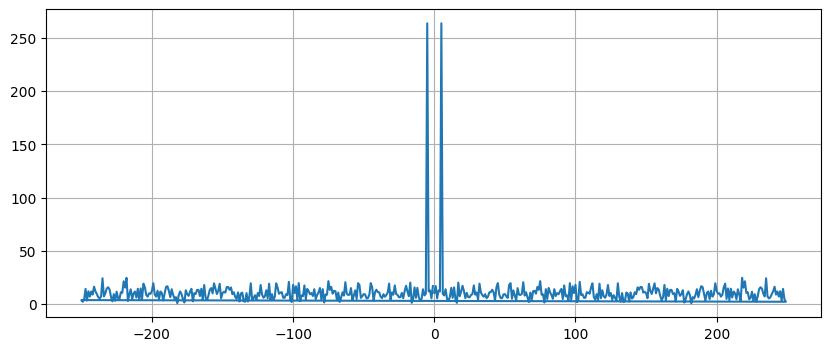

In [95]:
amplitude_sin = 1.0  # амплитуда синусоиды
frequency_sin = 5.0  # частота синусоиды
phase_sin = 0.0  # фаза синусоиды
amplitude_noise = 0.5  # амплитуда шума
duration = 1.0  # длительность сигнала

t, signal = generate_sinusoid_plus_noise_signal(amplitude_sin, frequency_sin, phase_sin, amplitude_noise, duration)

fft_freq, fft_amplitude, fft_phase = compute_fft(signal)


plt.figure(figsize=(10, 4))
plt.plot(fft_freq, fft_amplitude)
plt.grid(True)
plt.show()

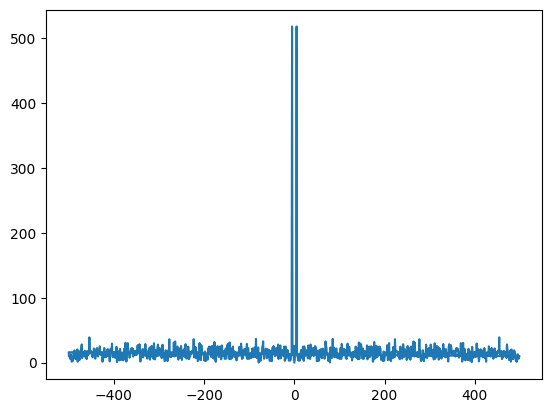

In [ ]:
# Пример

## **Задание 3: Фильтрация сигналов**

Фильтрация сигналов позволяет улучшить качество сигнала, убрав нежелательные частоты. Создайте функцию, которая принимает сигнал и частоту среза, и возвращает отфильтрованный сигнал.




1. Создайте функцию для фильтрации сигнала с использованием преобразования Фурье.

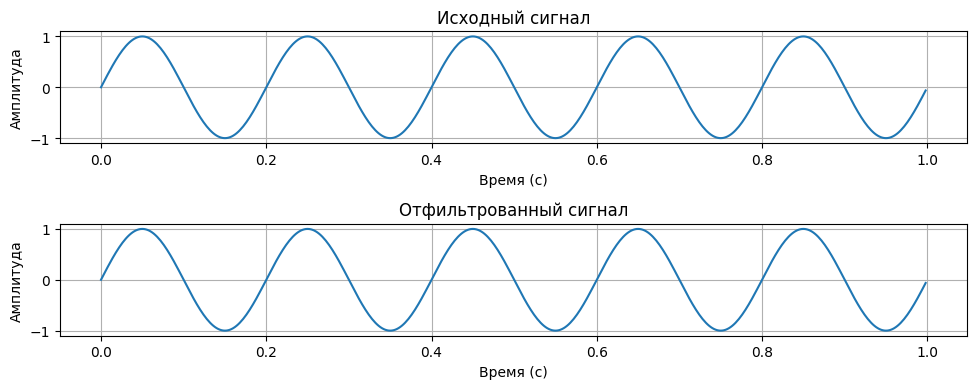

In [100]:
import numpy as np
from scipy.fft import fft, ifft


def lowpass_filter(signal, cutoff_freq, fs=500):

    fft_values = fft(signal)
    fft_freq = np.fft.fftfreq(len(signal), 1/fs)

    filter_values = np.zeros(len(fft_values))
    filter_values[(np.abs(fft_freq) < cutoff_freq)] = 1

    filtered_fft_values = fft_values * filter_values

    filtered_signal = np.real(ifft(filtered_fft_values))

    return filtered_signal

A = 1.0  # амплитуда
f = 5.0  # частота
phi = 0  # фаза
T = 1.0  # длительность

t, signal = generate_sinusoidal_signal(A, f, phi, T)

cutoff_freq = 10.0  # частота среза

filtered_signal = lowpass_filter(signal, cutoff_freq)


plt.figure(figsize=(10, 4))
plt.subplot(211)
plt.plot(t, signal)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Исходный сигнал')
plt.grid(True)

plt.subplot(212)
plt.plot(t, filtered_signal)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Отфильтрованный сигнал')

plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Пример

2. Примените эту функцию к сигналу, который представляет собой сумму синусоиды и шума, и визуализируйте результаты до и после фильтрации.

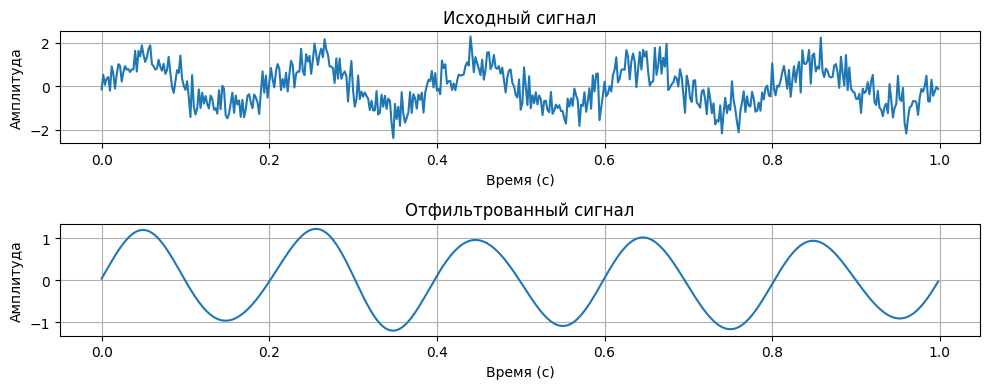

In [101]:
amplitude_sin = 1.0  # амплитуда синусоиды
frequency_sin = 5.0  # частота синусоиды
phase_sin = 0.0  # фаза синусоиды
amplitude_noise = 0.5  # амплитуда шума
duration = 1.0  # длительность сигнала

t, signal = generate_sinusoid_plus_noise_signal(amplitude_sin, frequency_sin, phase_sin, amplitude_noise, duration)

cutoff_freq = 10.0  # частота среза

filtered_signal = lowpass_filter(signal, cutoff_freq)


plt.figure(figsize=(10, 4))
plt.subplot(211)
plt.plot(t, signal)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Исходный сигнал')
plt.grid(True)

plt.subplot(212)
plt.plot(t, filtered_signal)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Отфильтрованный сигнал')

plt.grid(True)

plt.tight_layout()
plt.show()


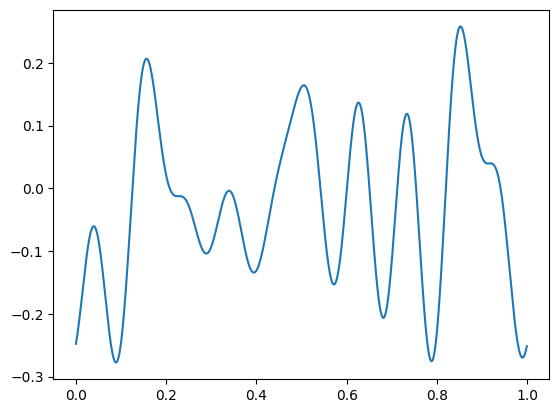

In [ ]:
# Пример

## **Задание 4: Анализ сигналов**

Анализ сигналов включает в себя различные методы и техники для изучения и понимания сигналов. Создайте функцию, которая принимает сигнал и возвращает его спектрограмму (**scipy.signal.spectrogram**).


**Спектрограмма** - это визуальное представление спектра частот сигнала во времени. Она показывает, какие частоты присутствуют в сигнале в каждый момент времени. Вот как правильно понимать спектрограмму:

- **Ось X**: Это время. Она показывает продолжительность сигнала. Каждый столбец на спектрограмме представляет собой отдельный момент времени.

- **Ось Y**: Это частота. Она показывает различные частоты, которые присутствуют в сигнале. Каждая строка на спектрограмме представляет собой отдельную частоту.

- **Значение**: Значение в каждой точке (x, y) показывает амплитуду (или интенсивность) данной частоты в данное время. Обычно более яркие цвета означают большую амплитуду, а более темные цвета - меньшую амплитуду.

Таким образом, спектрограмма позволяет вам видеть, как меняется спектральный состав сигнала во времени. Это может быть полезно во многих областях, включая анализ речи, музыку, радиосигналы и многое другое. Например, в анализе речи вы можете видеть, как меняются форманты (основные частоты) во время произношения различных звуков. В музыке вы можете видеть, как меняются ноты во время проигрывания песни.

1. Создайте функцию для вычисления и визуализации спектрограммы сигнала.


In [189]:
def plot_spectrogram(signal, sample_rate=1000, title='Спектрограмма'):
    f, t, Sxx = spectrogram(signal, sample_rate)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='nearest')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title(f'{title}')
    plt.colorbar(label='Intensity [dB]')
    plt.show()


2. Примените эту функцию к различным сигналам, которые вы сгенерировали и проанализировали в предыдущих заданиях.

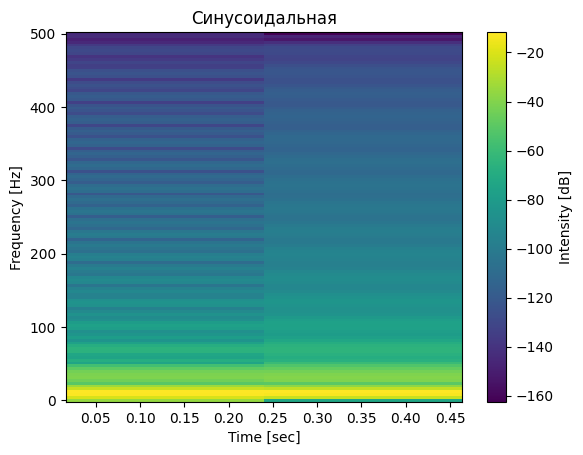

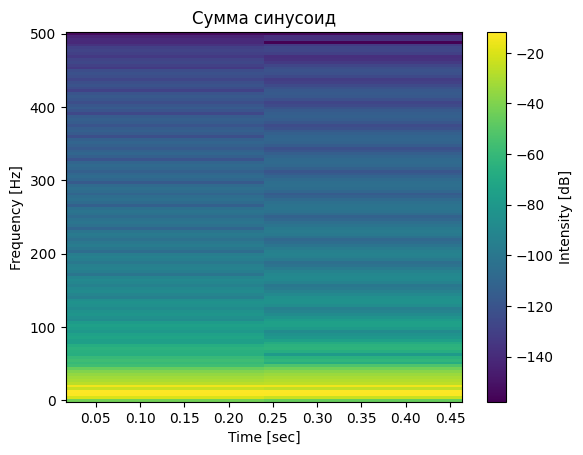

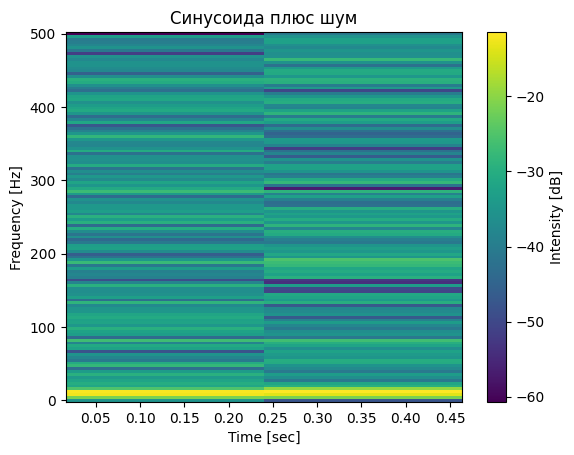

In [190]:
A = 1.0  # амплитуда
f = 5.0  # частота
phi = 0  # фаза
T = 1.0  # длительность

t, signal1 = generate_sinusoidal_signal(A, f, phi, T)
plot_spectrogram(signal1, title='Cинусоидальная')


A1 = -1  # амплитуда первой синусоиды
f1 = 5.0  # частота первой синусоиды
phi1 = 0.1  # фаза первой синусоиды
A2 = 0.5  # амплитуда второй синусоиды
f2 = 10.0  # частота второй синусоиды
phi2 = 0.2  # фаза второй синусоиды
T = 1.0  # длительность сигнала


t, signal2 = generate_sum_of_sinusoids_signal(A1, f1, phi1, A2, f2, phi2, T)
plot_spectrogram(signal2, title='Сумма синусоид')


amplitude_sin = 1.0  # амплитуда синусоиды
frequency_sin = 5.0  # частота синусоиды
phase_sin = 0.0  # фаза синусоиды
amplitude_noise = 0.5  # амплитуда шума
duration = 1.0  # длительность сигнала

t, signal3 = generate_sinusoid_plus_noise_signal(amplitude_sin, frequency_sin, phase_sin, amplitude_noise, duration)
plot_spectrogram(signal3, title='Синусоида плюс шум')


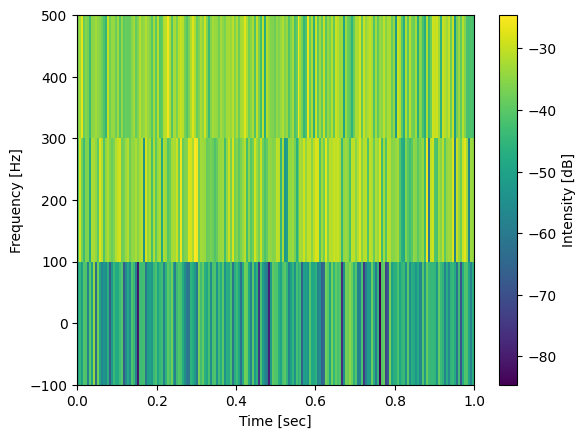

In [ ]:
# Пример

# Блок №2. Повышенный уровень

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.io import wavfile

## **Задание 1: Чтение и визуализация звукового файла**











В этом задании вам нужно использовать функцию `wavfile.read` из модуля `scipy.io` для чтения звукового файла. Эта функция возвращает частоту дискретизации и данные аудиосигнала. Затем вы должны визуализировать эти данные с помощью `matplotlib.pyplot.plot`. В результате вы получите график амплитуды звукового сигнала во времени.

1. Используйте библиотеку `scipy.io.wavfile` для чтения звукового файла.

In [191]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [221]:
from scipy.io import wavfile
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/SEREGA_PIRAT.wav"


sample_rate, data = wavfile.read(file_path)

time = np.arange(len(data)) / sample_rate

2. Визуализируйте временную форму звукового сигнала.

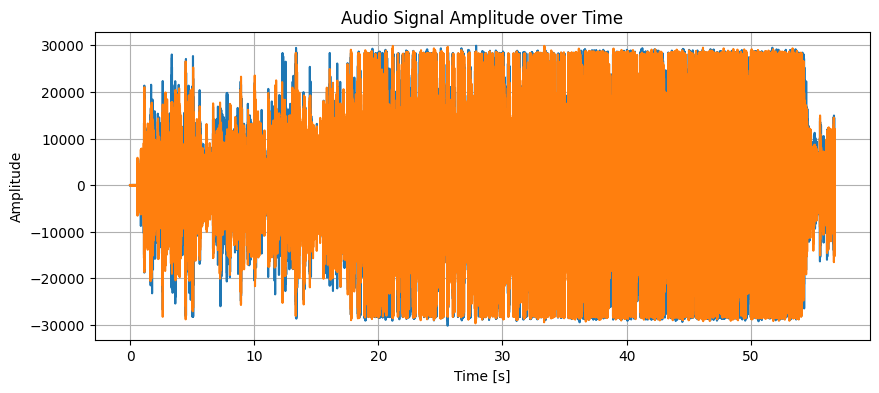

In [223]:
plt.figure(figsize=(10, 4))
plt.plot(time, data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Audio Signal Amplitude over Time')
plt.grid(True)
plt.show()

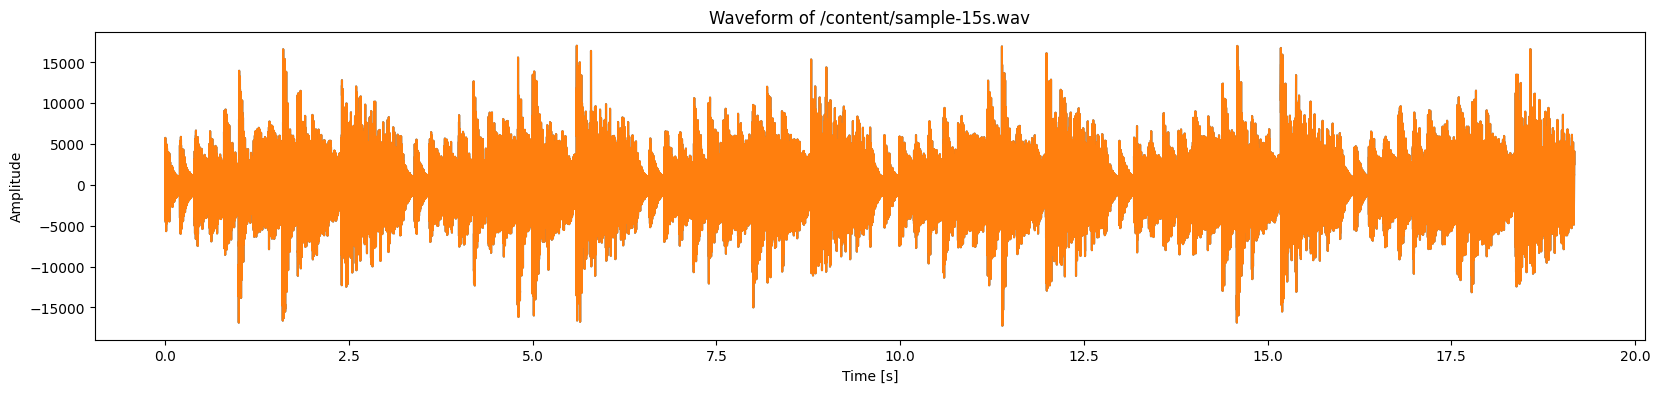

In [ ]:
# Пример

## **Задание 2: Применение преобразования Фурье**



Преобразование Фурье позволяет перейти от временного представления сигнала к частотному. Для его применения вы можете использовать функцию `fft` из модуля `scipy.fft`. Эта функция возвращает комплексные коэффициенты преобразования Фурье, которые затем можно визуализировать.

1. Примените преобразование Фурье к звуковому сигналу и визуализируйте спектр.

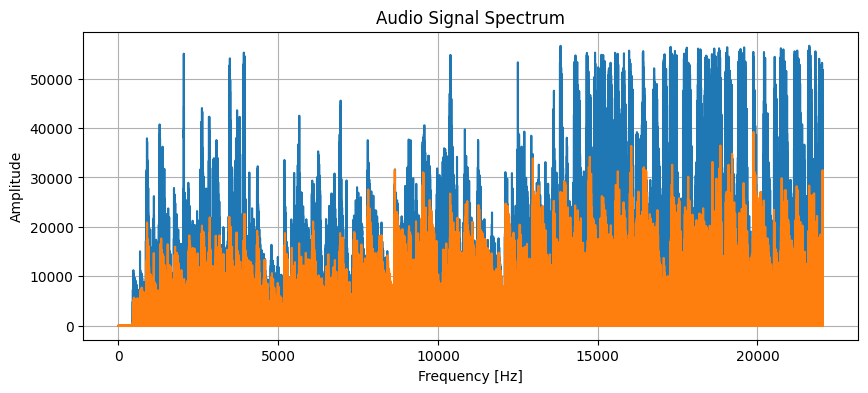

In [224]:
fft_result = fft(data)


freqs = np.fft.fftfreq(len(data), 1 / sample_rate)
positive_freqs = freqs[:len(freqs) // 2]


fft_magnitude = np.abs(fft_result[:len(fft_result) // 2])


plt.figure(figsize=(10, 4))
plt.plot(positive_freqs, fft_magnitude)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('Audio Signal Spectrum')
plt.grid(True)
plt.show()

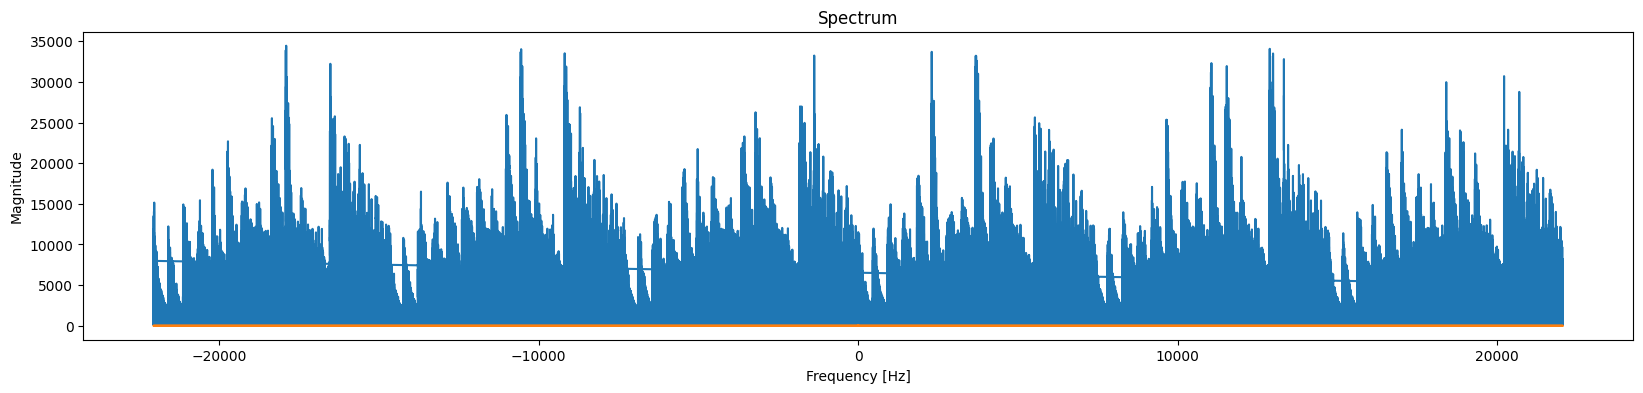

In [ ]:
# Пример

## **Задание 3: Фильтрация сигнала**



Фильтрация сигнала позволяет улучшить качество звука, убрав нежелательные частоты. Для этого вы можете использовать преобразование Фурье, затем обнулить некоторые из его коэффициентов и выполнить обратное преобразование Фурье с помощью функции `ifft` из модуля `scipy.fft`.

1. Создайте функцию для фильтрации сигнала с использованием преобразования Фурье.


In [225]:
from scipy.fft import fft, ifft

def smooth_signal(signal, window_size):
    n_channels = signal.shape[1]
    n_samples = signal.shape[0]
    smoothed_signal = np.zeros_like(signal)

    for i in range(n_channels):
        for j in range(n_samples):
            start = max(0, j - window_size // 2)
            end = min(n_samples, j + window_size // 2 + 1)
            window = signal[start:end, i]
            smoothed_signal[j, i] = np.median(window)

    return smoothed_signal

2. Примените эту функцию к звуковому сигналу и визуализируйте результаты до и после фильтрации.

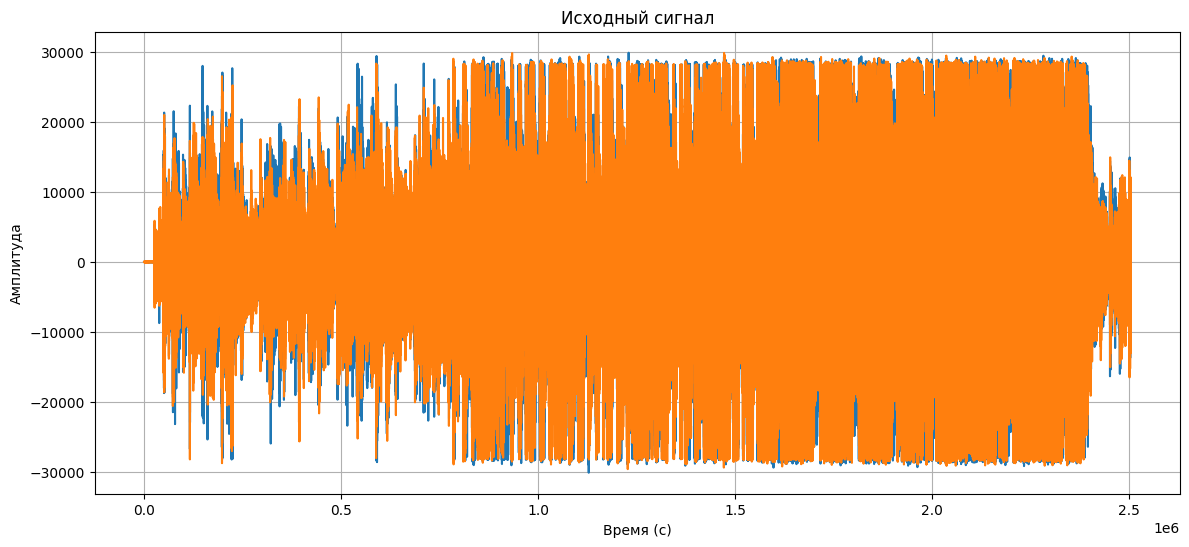

In [226]:
plt.figure(figsize=(14, 6))
plt.plot(data)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Исходный сигнал')
plt.grid(True)
plt.show()

In [227]:
window_size = 5
filtered_signal_left = smooth_signal(data, window_size)

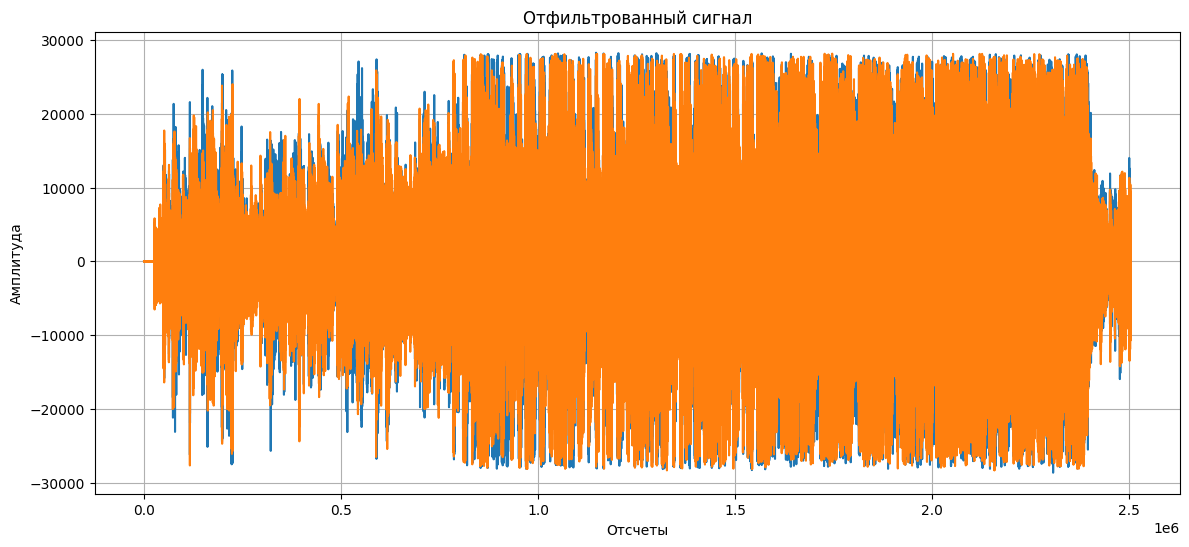

In [228]:
plt.figure(figsize=(14, 6))
plt.plot(filtered_signal_left)
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.title('Отфильтрованный сигнал')
plt.grid(True)
plt.show()

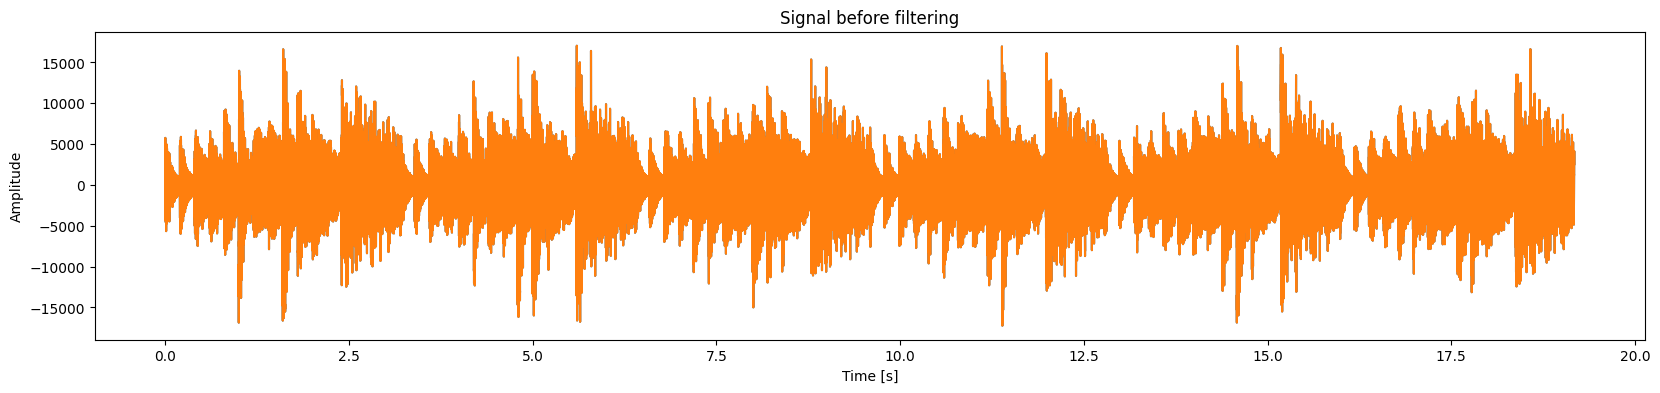

In [ ]:
# Визуализация сигнала до фильтрации

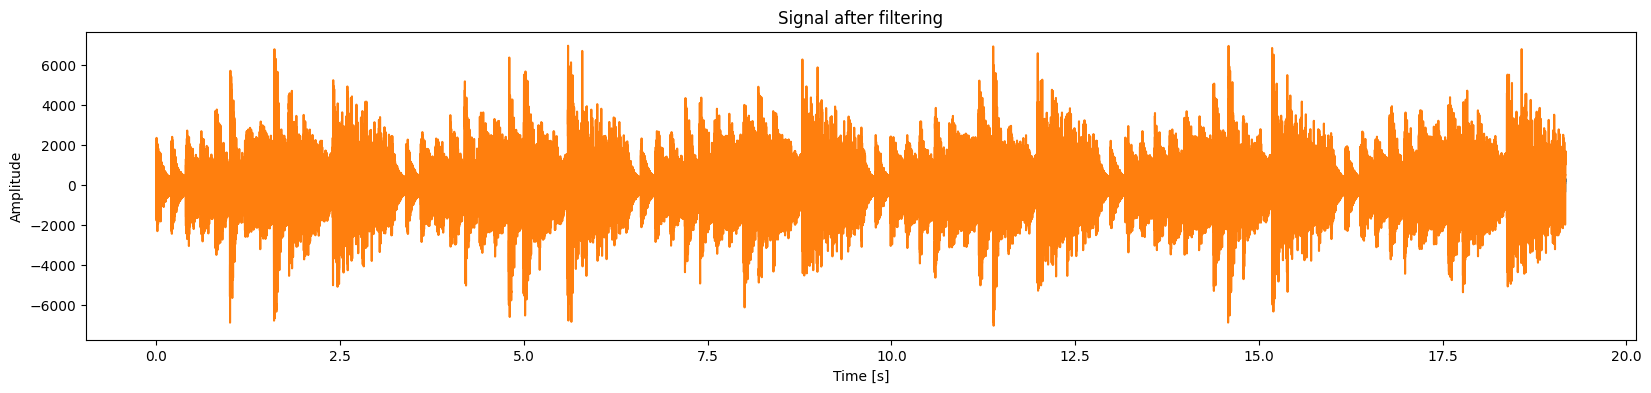

In [ ]:
# Визуализация сигнала после фильтрации

## **Задание 4: Обратное преобразование Фурье**



После фильтрации сигнала вы можете применить обратное преобразование Фурье для получения отфильтрованного звукового сигнала во временной области. Затем вы можете сохранить этот сигнал в новый звуковой файл с помощью функции `wavfile.write` из модуля `scipy.io`.

1. Примените обратное преобразование Фурье к отфильтрованному сигналу.


In [229]:
from scipy.fft import ifft
from scipy.io import wavfile

# Применение обратного преобразования Фурье к отфильтрованному сигналу
filtered_signal_inverse = ifft(filtered_signal_left)

# Приведение комплексных чисел к вещественным значениям
filtered_signal_inverse = filtered_signal_inverse.real.astype(np.int16)

2. Сохраните полученный сигнал в новый звуковой файл.

In [230]:
output_file_path = "/content/drive/MyDrive/filtered_sereaga.wav"
wavfile.write(output_file_path, sample_rate, filtered_signal_inverse)